
## 1. Loss function과 gradient descent algorithm

정답 레이블 $y_i$와 예측 레이블 $\hat{y_i}$ 사이의 cross-entrophy loss는 아래와 같은 수식으로 정의한다. 여기서 C는 분류할 클래스의 개수이다.



\begin{align}
CELoss = -\sum^C_{i=1} (y_i \cdot \log (\hat{y_i}+\epsilon))
\end{align}

데이터셋이 매우 큰 경우 메모리 사용량이나 계산된 손실의 정확도 측면에서 단점이 많기때문에 실제 뉴럴네트워크에서는 일부 데이터의 묶음인 mini-batch를 기반으로 한 mini-batch gradient descent를 진행하거나 랜덤 데이터 샘플을 기반으로 한 stochastic gradient descent(SGD) 방식을 사용한다.

오늘 실습은 랜덤 데이터 샘플을 기반으로 한  stochastic gradient descent(SGD)을 이용해 뉴럴네트워크를 학습 할 예정이다.

In [2]:
import numpy as np
np.random.seed(2359)

# softmax function: np.exp에 너무 큰값이 들어가지 않도록 수정
def Softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1)

# CELoss
def CELoss(y_hat, y):
    loss = -np.sum(y * np.log(y_hat + 0.00001))
    return loss

# 지난주에 사용하였던 샘플 이미지 데이터
# 데이터 처리의 편의를 위해 flatten을 적용 (2,2) -> (4,)
x_1 = np.array([[56, 231],
                [24, 1]]).flatten()
x_2 = np.array([[120, 30],
                [24, 0]]).flatten()
x_3 = np.array([[20, 31],
                [240, 100]]).flatten()
x_4 = np.array([[56, 201],
                [22, -10]]).flatten()
x_5 = np.array([[140, 27],
                [30, 10]]).flatten()
x_6 = np.array([[25, 30],
                [230, 110]]).flatten()

# one-hot vector 정의하기
y_1 = np.array([1, 0, 0])  # label_cat
y_2 = np.array([0, 1, 0])  # label_dog
y_3 = np.array([0, 0, 1])  # label_ship
y_4 = np.array([1, 0, 0])  # label_cat_2
y_5 = np.array([0, 1, 0])  # label_dog_2
y_6 = np.array([0, 0, 1])  # label_ship_2

# 데이터셋
X = np.array([x_1, x_2, x_3, x_4, x_5, x_6])  # data
Y = np.array([y_1, y_2, y_3, y_4, y_5, y_6])  # label


# CELoss 테스트
print("오답 CELoss :", CELoss(np.array([0.1, 0.1, 0.9]), Y[0]))
print("정답 CELoss :", CELoss(np.array([0.9, 0.1, 0.1]), Y[0]))


오답 CELoss : 2.302485097993712
정답 CELoss : 0.10534940460844315


## 2. Linear layer의 미분




Linear layer의 forward 연산은 $Y = XW$과 같이 정의된다. 여기서, 입력 $X$는 $N\times D$ shape로 N개의 minibatch 데이터와 $D$ 차원의 데이터를 갖는다. 가중치 행렬 $W$은 $D \times M$ shape로 입력 차원 $D$와, 출력 차원 $M$으로 정의한다. 여기서 가중치 행렬 $W$와 입력 데이터 $X$ 각각 따른 편미분은 다음과 같은 간단한 공식으로 정의된다.


\begin{align}
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}  W^T.
\end{align}

여기서 $\frac{\partial L}{\partial Y}$는 $N \times M$ shape를 갖으므로, $\frac{\partial L}{\partial X}$는 $N \times D$의 shape를 갖는다 ($X$와 같음).



\begin{align}
\frac{\partial L}{\partial W} =  X^T \frac{\partial L}{\partial Y},
\end{align}

$\frac{\partial L}{\partial W}$은 $W$와 동일한 shape ($D \times M$)을 갖게된다. 위 공식에 대한 유도과정은 다음 [pdf링크](http://cs231n.stanford.edu/handouts/linear-backprop.pdf)에 자세하게 설명되어 있으니 심도있게 공부할 학생은 참고하도록 한다.


## 3. Softmax + Cross entrophy loss의 미분

일반적으로 CELoss는 Softmax가 적용된 출력을 입력으로 받으며, [softmax+CELoss] 결합 모듈을 입력값으로 미분하게 될 때 매우 간결한 형태의 analytic gradient를 얻는다.

\begin{align}
\frac{\partial L}{\partial z_i} = \hat{y} - y,
\end{align}

여기서 $z_i$는 softmax에 들어가는 입력 (혹은 앞 레이어의 출력)이다. $\hat{y}$은 뉴럴넷의 예측결과이자 Softmax의 출력값이며, $y$는 정답 레이블을 뜻한다.   CELoss + Softmax 결합 모듈의 미분 증명은 [(참고자료)](https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba)를 살펴보면 된다.


## 실습과제. Backpropagation을 이용한 뉴럴네트워크 재구현

지난 시간에 구현하였던 간단한 선형분류기+Softmax+CELoss 구조를 갖는 뉴럴네트워크를 아래와 같이 python class로 구현하였다.

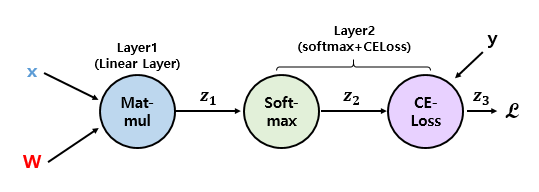


여기서 Linear(in, out)은 입력in개와 출력 out개를 갖는 선형분류기를 뜻한다. Backward 함수를 구현하여 본 뉴럴넷의 학습을 동작하게 만드시오.





In [3]:
X.shape #크기 (N, D) = (6, 4)
Y.shape #크기 (N, M) = (6, 3)
#W.shape 크기 (D, M) = (4, 3)

(6, 3)

In [56]:
#batch_size가 2일 경우

import numpy as np
np.random.seed(2359)

# Single-layer Neural Network class
class NN_1layer():
    def __init__(self, **kwargs):
        self.W_l1 = np.random.rand(4, 3)
        self.activation = Softmax
        self.Loss = CELoss
        self.learning_rate = 0.0001

    def Forward(self, X):
        # layer 1
        z_1 = np.matmul(X, self.W_l1)
        # softmax
        y_hat = self.activation(z_1)

        # data reshape(1, N)
        return y_hat

    def getLoss(self, X, y):
        # y_hat -> CELoss <- y
        y_hat = self.Forward(X)
        return self.Loss(y_hat, y)

    def Backward(self, y_hat, x, y):
        ####################################
        ##### 이곳에 코드를 작성하시오 #####
        # backpropagation 힌트
        # 1. softmax와 CELoss는 한개의 레이어로 간주하고 미분
        #   x -> [Linear(4,3)] -> [Softmax -> CELoss] <- y_hat
        # 2. 두 레이어의 gradient 공식은 위의 각 레이어 미분 공식을 분석
        #   분석 시 함수, 입력, 출력 기호를 명확하게 파악할 것!

        # Backpropagation 공식
        #   Downstream gradient = UpstreamGradient * LocalGradient
        # - 각 레이어 별 LocalGradient 계산법을 파악
        # - 각 레이어 별 UpstreamGradient가 무엇인지 파악
        # - 위 두가지를 곱하여 downstreamGradient를 계산

        # 참고.
        # 학생의 이해를 돕기위해 랜덤 샘플 데이터 기반의 stochastic gradient
        # descent를 수행한다(batch size = 1).
        # 배치 단위의 학습은 추후 중간 프로젝트로 수행 예정

        dW1Loss = np.zeros_like(self.W_l1)

        # dCELoss
        #위에서 softmax + CEloss 함수의 미분은 y_hat - y 이라는 간단한 결과라고 했다.
        dCELoss = y_hat - y

        # dW1Loss은 UpstreamGradient * LocalGradient의 결과 -> X.T * dCELoss
        # 즉, W에 대한 L의 미분값은 X.T * dCELoss(다음 결과의 미분값)를 곱한 것이다
        dW1Loss += np.matmul(x.T, dCELoss) #(N, D).T * (N, M) -> (D, N) * (N, M) -> (D, M)은 W의 shape

        ####################################

        return dW1Loss

    def Training(self, X, Y, n_epoch=25):
        iterations = 0
        random_order = list(range(X.shape[0]))
        while iterations < n_epoch:
            np.random.shuffle(random_order)

            loss_iter = 0.0
            # stochastic gradient descent algorithm (랜덤 개별 데이터 단위 연산)
            for i in random_order:
                # data sample
                x = X[np.newaxis, i] # reshape(1, D)
                y = Y[np.newaxis, i] # reshape(1, M)

                y_hat = self.Forward(x)
                dWLoss = self.Backward(y_hat, x, y)

                # gradient descent algorithm
                self.W_l1 -= dWLoss * self.learning_rate
                loss_iter += self.getLoss(x, y)

            print(f'iteration: {iterations + 1}, loss: {loss_iter}')
            iterations += 1


my_NeuralNet = NN_1layer()
my_NeuralNet.Training(X, Y)

iteration: 1, loss: 43.12349441051917
iteration: 2, loss: 16.618724926106218
iteration: 3, loss: 6.245043813048303
iteration: 4, loss: 1.7710151425429932
iteration: 5, loss: 0.3131823691111316
iteration: 6, loss: 0.17196008929925444
iteration: 7, loss: 0.12348515866445574
iteration: 8, loss: 0.09767492428049046
iteration: 9, loss: 0.08136027060575968
iteration: 10, loss: 0.06990993063456191
iteration: 11, loss: 0.06143193575224494
iteration: 12, loss: 0.054848959191346476
iteration: 13, loss: 0.04959436913661146
iteration: 14, loss: 0.04529014373216006
iteration: 15, loss: 0.041678536216182074
iteration: 16, loss: 0.03861450754786633
iteration: 17, loss: 0.03598760575706091
iteration: 18, loss: 0.033699528209683006
iteration: 19, loss: 0.031690796601872566
iteration: 20, loss: 0.029903766093346374
iteration: 21, loss: 0.028319332619816093
iteration: 22, loss: 0.026892105911840113
iteration: 23, loss: 0.025608505927258187
iteration: 24, loss: 0.024440119241655386
iteration: 25, loss: 0.

In [77]:
#batch_size가 2일 경우

import numpy as np
np.random.seed(2359)

def Softmax_batch(x):
    e_x = np.zeros_like(x)
    for i in range(x.shape[0]):
      e_x[i] += np.exp(x[i] - np.max(x[i]))
      e_x[i] /= e_x[i].sum(axis = 0)

    return e_x

# Single-layer Neural Network class
class NN_1layer():
    def __init__(self, **kwargs):
        self.W_l1 = np.random.rand(4, 3)
        self.activation = Softmax_batch
        self.Loss = CELoss
        self.learning_rate = 0.0001

    def Forward(self, X):
      z_1 = np.matmul(X, self.W_l1)
      # softmax
      y_hat = self.activation(z_1)
      # data reshape(2, N)
      return y_hat

    def getLoss(self, X, y):
        # y_hat -> CELoss <- y
        y_hat = self.Forward(X)
        return self.Loss(y_hat, y)

    def Backward(self, y_hat, x, y):
        ####################################
        ##### 이곳에 코드를 작성하시오 #####

        dW1Loss = np.zeros_like(self.W_l1)

        # dCELoss
        #위에서 softmax + CEloss 함수의 미분은 y_hat - y 이라는 간단한 결과라고 했다.
        dCELoss = y_hat - y

        # dW1Loss은 UpstreamGradient * LocalGradient의 결과 -> X.T * dCELoss
        # 즉, W에 대한 L의 미분값은 X.T * dCELoss(다음 결과의 미분값)를 곱한 것이다
        dW1Loss += np.matmul(x.T, dCELoss) #(N, D).T * (N, M) -> (D, N) * (N, M) -> (D, M)은 W의 shape

        ####################################

        return dW1Loss

    def Training(self, X, Y, n_epoch=25, batch_size = 2):
        iterations = 0
        x_size = X.shape[0]
        random_order = list(range(x_size))
        while iterations < n_epoch:
            np.random.shuffle(random_order)

            loss_iter = 0.0
            # stochastic gradient descent algorithm (랜덤 개별 데이터 단위 연산)
            for i in range(0, x_size,batch_size):
                # data sample
                x = X[random_order[i:i+batch_size]] # reshape(1, D)
                y = Y[random_order[i:i+batch_size]] # reshape(1, M)


                y_hat = self.Forward(x)
                dWLoss = self.Backward(y_hat, x, y)

                # gradient descent algorithm
                self.W_l1 -= dWLoss * self.learning_rate
                loss_iter +=  self.getLoss(x, y)

            print(f'iteration: {iterations + 1}, loss: {loss_iter}')
            iterations += 1


my_NeuralNet = NN_1layer()
my_NeuralNet.Training(X, Y)

iteration: 1, loss: 42.509860303760114
iteration: 2, loss: 16.755584605570974
iteration: 3, loss: 6.241691295325678
iteration: 4, loss: 1.7648295160605285
iteration: 5, loss: 0.31048909828365295
iteration: 6, loss: 0.17006324990345126
iteration: 7, loss: 0.12205459047639393
iteration: 8, loss: 0.09683161508298747
iteration: 9, loss: 0.08055968254462993
iteration: 10, loss: 0.0689194553086438
iteration: 11, loss: 0.06096613902116958
iteration: 12, loss: 0.05424040720729305
iteration: 13, loss: 0.04912113718092017
iteration: 14, loss: 0.04467041918261077
iteration: 15, loss: 0.04124884457038965
iteration: 16, loss: 0.03829318740246958
iteration: 17, loss: 0.035690028348765425
iteration: 18, loss: 0.03335955298152047
iteration: 19, loss: 0.031479321215384395
iteration: 20, loss: 0.02959255617903409
iteration: 21, loss: 0.02812748717023274
iteration: 22, loss: 0.02675505320708526
iteration: 23, loss: 0.025480447394707152
iteration: 24, loss: 0.024218638596531922
iteration: 25, loss: 0.0231

-----------------------------------------

# 과제 02 - Two layer 뉴럴넷 backpropagation (스마트리드 과제항목 체크)

위 네트워크 구조를 아래와 같이 다음과 같이 바꾸어 보고 학습을 성공시켜 보시오. init(), Forward와 Backward 함수를 수정해야 한다.





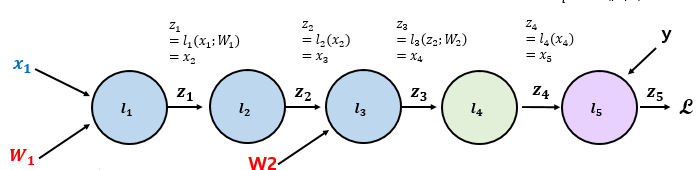


### 네트워크 구조:
### Linear -> ReLU -> Linear -> Softmax -> CELoss


In [92]:
import numpy as np
np.random.seed(2359)

def ReLU(x):
    return np.maximum(0, x)

# derivatives of ReLU
# ReLU 함수의 local gradient를 계산
# if (x > 0):
#     return 1
# if (x <= 0):
#     return 0
def dReLU(x):
    return 1 * (x > 0)


# Two-layer Neural Network class
class NN_2layer():
    def __init__(self, **kwargs):
        self.W_l1 = np.random.rand(4,4)
        self.W_l2 = np.random.rand(4,3)

        ####################################
        ##### 이곳에 코드를 작성하시오 #####
        self.activation1 = ReLU
        self.dActivation1 = dReLU
        self.activation2 = Softmax
        self.Loss = CELoss
        self.learning_rate = 0.0002

        # 필요 시 코드 추가

        ####################################


    def Forward(self, x):
        ####################################
        ##### 이곳에 코드를 작성하시오 #####
        # layer 1
        z_1 = np.matmul(x, self.W_l1)

        # layer 2
        z_1 = self.activation1(z_1)

        # layer 3
        z_2 = np.matmul(z_1, self.W_l2)

        # softmax
        y_hat = self.activation2(z_2)

        ####################################
        return y_hat


    def getLoss(self, x, y):
        # y_hat -> CELoss <- y
        y_hat = self.Forward(x)
        return self.Loss(y_hat, y)

    def Backward(self, y_hat, x, y):
        ####################################
        ##### 이곳에 코드를 작성하시오 #####
        # backpropagation 힌트
        # 1. softmax와 CELoss는 한개의 레이어로 간주하고 미분
        #   x -> [Linear(4,3)] -> [Softmax -> CELoss] <- y_hat
        # 2. 두 레이어의 gradient 공식은 위의 각 레이어 미분 공식을 분석
        #   분석 시 함수, 입력, 출력 기호를 명확하게 파악할 것!

        # Backpropagation 공식
        #   Downstream gradient = UpstreamGradient * LocalGradient
        # - 각 레이어 별 LocalGradient 계산법을 파악
        # - 각 레이어 별 UpstreamGradient가 무엇인지 파악
        # - 위 두가지를 곱하여 downstreamGradient를 계산

        # 참고.
        # 학생의 이해를 돕기위해 랜덤 샘플 데이터 기반의 stochastic gradient
        # descent를 수행한다(batch size = 1).

        dW1Loss = np.zeros_like(self.W_l1) #W1에 대한 L 미분값
        dW2Loss = np.zeros_like(self.W_l2) #W2에 대한 L 미분값

        # CElayer Loss
        #Downstream gradient = UpstreamGradient * LocalGradient
        #softmax + CELoss의 미분값은 y_hat - y 이고 l3의 upstream_gradient이다.
        CElayer_Loss = y_hat - y

        # dW2Loss
        dW2Loss += np.matmul(self.activation1(np.matmul(x, self.W_l1)).T, CElayer_Loss)

        # dz2Loss
        dz2Loss = np.matmul(CElayer_Loss, self.W_l2.T)

        # dz1Loss
        #Downstream gradient = UpstreamGradient * LocalGradient
        dz1Loss = dz2Loss * self.dActivation1(np.matmul(x, self.W_l1))

        # dW1Loss
        dW1Loss += np.matmul(x.T, dz1Loss)

        ####################################
        return dW1Loss, dW2Loss

    def Training(self, X, Y, n_epoch=25):
        iterations = 0
        random_order = list(range(X.shape[0]))
        while iterations < n_epoch:
            np.random.shuffle(random_order)

            loss_iter = 0.0
            # stochastic gradient descent algorith (랜덤 개별 데이터 단위 연산)
            for i in random_order:
                # data sample
                x = X[np.newaxis, i]   # reshape(1, D)
                y = Y[np.newaxis, i]   # reshape(1, M)

                ####################################
                ##### 이곳에 코드를 작성하시오 #####

                y_hat = self.Forward(x)
                dW1Loss, dW2Loss = self.Backward(y_hat, x, y)

                # gradient descent algorithm

                self.W_l1 -= dW1Loss * self.learning_rate
                self.W_l2 -= dW2Loss * self.learning_rate
                ####################################
                loss_iter += self.getLoss(x, y)

            print(f'iteration: {iterations + 1}, loss: {loss_iter}')
            iterations += 1


my_NeuralNet = NN_2layer()
my_NeuralNet.Training(X, Y)


iteration: 1, loss: 23.037654765470336
iteration: 2, loss: 23.034571409470843
iteration: 3, loss: 23.026895036334796
iteration: 4, loss: 23.02683864559421
iteration: 5, loss: 23.042173692120826
iteration: 6, loss: 10.033265780318724
iteration: 7, loss: 0.052442007220116056
iteration: 8, loss: 0.017874588963910875
iteration: 9, loss: 0.014206115674355594
iteration: 10, loss: 0.011683782313459814
iteration: 11, loss: 0.010011908466293278
iteration: 12, loss: 0.008781284933433529
iteration: 13, loss: 0.007835558020807779
iteration: 14, loss: 0.007084035307971386
iteration: 15, loss: 0.00647381328557032
iteration: 16, loss: 0.005966654743114597
iteration: 17, loss: 0.005538485357642336
iteration: 18, loss: 0.005176191746327908
iteration: 19, loss: 0.00485540656937747
iteration: 20, loss: 0.004577820956437817
iteration: 21, loss: 0.00433301524091149
iteration: 22, loss: 0.0041148884043595
iteration: 23, loss: 0.003919937632997489
iteration: 24, loss: 0.0037458334681266807
iteration: 25, los